<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Planejamento de Experimentos 
</h1>


# <font color='red' style='font-size: 30px;'>1.0 Introdução   </font>
<hr style='border: 2px solid red;'>




<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> “Chamar um especialista em estatística depois que o experimento foi feito pode ser o mesmo que pedir para ele fazer um exame post-mortem. Talvez ele consiga dizer do que foi que o experimento morreu.”  </i>     
</p>    

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: right; text-indent: 0px;'>    
    <b>Sir Ronald Fisher</b>  

<hr>






# <font color='red' style='font-size: 30px;'> Introdução à análise de experimentos   </font>
<hr style='border: 2px solid red;'>

# <font color = 'purple'> Inserindo o experimento num Data Frame </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

## Importando as bibliotecas 

In [130]:
import warnings

warnings.filterwarnings('ignore')

### Pandas

https://pandas.pydata.org/

In [131]:
import pandas as pd

### Numpy

http://www.numpy.org/

In [132]:
import numpy as np



<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Ensaios realizados na forma normalizada</b> 


<img width='800px' src='../images/Figura_2.png'>

 
   
   
    


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
<font color="MidnightBlue"> Construindo uma matriz representando todos os ensaios realizados:


In [133]:
data = pd.DataFrame(
    data = {
        'Farinha': [-1, 1, -1, 1],
        'Chocolate': [-1, -1, 1, 1],
        'Porçoes': [19, 37, 24, 49]
    },
)

""" OR
data = pd.DataFrame(
    np.array([[-1, -1, 19], [1, -1, 37], [-1, 1, 24], [1, 1, 49]]),
    columns = ['Farinha', 'Chocolate', 'Porções'],   
)
"""

" OR\ndata = pd.DataFrame(\n    np.array([[-1, -1, 19], [1, -1, 37], [-1, 1, 24], [1, 1, 49]]),\n    columns = ['Farinha', 'Chocolate', 'Porções'],   \n)\n"

In [134]:
data

,Farinha,Chocolate,Porçoes
0,-1,-1,19
1,1,-1,37
2,-1,1,24
3,1,1,49


### pyDOE2

https://pypi.org/project/pyDOE2/

In [135]:
!pip install pyDOE2

In [136]:
import pyDOE2 as doe

## Costruindo um planejamento fatorial de 2²


In [137]:
essay = doe.ff2n(2)

In [138]:
essay

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

## Incerindo o planejamento em um Data Frame

In [139]:
experiment = pd.DataFrame(
    essay,
    columns = ['Farinha', 'Chocolate'],   
)

In [140]:
experiment

,Farinha,Chocolate
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


### Inserindo coluna com os resultados 

In [141]:
experiment['Porcoes'] = [19, 37, 24, 49]

In [142]:
experiment

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


<hr>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="MidnightBlue"> <b>Conclusão:</b> Temos, por fim, nosso experimento representado por um <i>DataFrame</i> do Pandas. Usaremos este <i>DataFrame</i> para iniciarmos a análise do nosso experimento. 
    
<hr>   

# <font color = 'purple'> Analisando graficamente o experimento   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

###  Importando o Seaborn

https://seaborn.pydata.org

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

In [144]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('terrain')

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

### Para a farinha

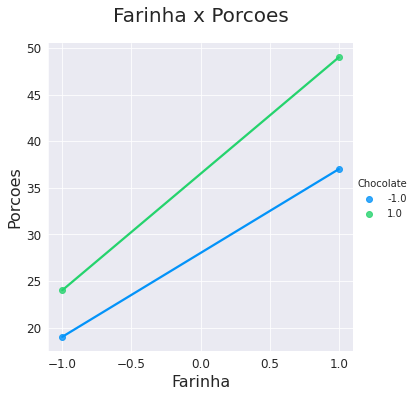

In [145]:
sns.lmplot(data = experiment, x = 'Farinha', y = 'Porcoes', ci = None, hue = 'Chocolate')
# ci -> Confident interval
ax = plt.gca()
ax.set_title('Farinha x Porcoes', fontsize = 20, y = 1.05)
ax.set_xlabel('Farinha', fontsize = 16)
ax.set_ylabel('Porcoes', fontsize = 16)
ax.tick_params(labelsize = 12)
ax.set_xticks = (-1, 1)

> Flour effect when chocolate is at the lower and upper limit

### Para o chocolate

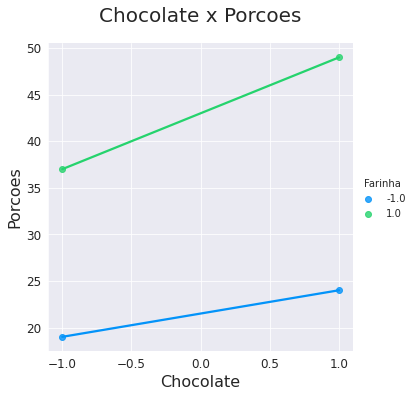

In [146]:
sns.lmplot(data = experiment, x = 'Chocolate', y = 'Porcoes', ci = None, hue = 'Farinha')
# ci -> Confident interval
ax = plt.gca()
ax.set_title('Chocolate x Porcoes', fontsize = 20, y = 1.05)
ax.set_xlabel('Chocolate', fontsize = 16)
ax.set_ylabel('Porcoes', fontsize = 16)
ax.tick_params(labelsize = 12)
ax.set_xticks = (-1, 1)

> Chocolate effect when flour is at the lower and upper limit

# <font color = 'purple'> Ajustando o modelo estatístico </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

<hr>

<img width='800px' src='../images/Figura_3.png'>

<p style='margin: 30px 30px;'> 

<hr>


### Bibliotecas  Stats Model


In [147]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

In [148]:
model = smf.ols(data = experiment, formula = 'Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [149]:
fitted_model = model.fit()

In [150]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Porcoes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 22 Aug 2022   Prob (F-statistic):                nan
Time:                        11:01:56   Log-Likelihood:                    inf
No. Observations:                   4   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        nan        nan        nan         nan         nan
Farinha              10.7500        nan        nan        nan         nan         nan
Chocolate             4.2500        nan        nan        nan         nan         nan
Farinha:Chocolate     1.7500        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.500
Skew:                           0.000   Prob(JB):                        0.472
Kurtosis:                       0.000   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> We can see above that the <b>Df Residuals(Degrees of Freedom Residuals)</b> is 0. We need increase this value

# <font color = 'purple'> Aumentando os Graus de liberdade  </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>



<p style='margin: 30px 30px;'>     
    


<hr>


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Replicatas no centro</b>


<img width='800px' src='../images/Figura_5.png'> 


<p style='margin: 30px 30px;'> 
    
    
 
    

    
<hr>    

In [151]:
center = np.array([[0, 0, 29], [0, 0, 30], [0, 0, 29], [0, 0, 30]])

In [152]:
center = pd.DataFrame(center, columns = ['Farinha', 'Chocolate', 'Porcoes'], index = [4, 5, 6, 7])
center

,Farinha,Chocolate,Porcoes
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


In [153]:
experiment = experiment.append(center)
experiment

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49
4,0.0,0.0,29
5,0.0,0.0,30
6,0.0,0.0,29
7,0.0,0.0,30


# <font color = 'purple'>  Análise de significância estatística   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [154]:
model = smf.ols(data = experiment, formula = 'Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [155]:
fitted_model = model.fit()

In [156]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Porcoes   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Mon, 22 Aug 2022   Prob (F-statistic):            0.00152
Time:                        11:01:56   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.8750      0.710     43.494      0.000      28.904      32.846
Farinha              10.7500      1.004     10.708      0.000       7.963      13.537
Chocolate             4.2500      1.004      4.233      0.013       1.463       7.037
Farinha:Chocolate     1.7500      1.004      1.743      0.156      -1.037       4.537
==============================================================================
Omnibus:                        4.655   Durbin-Watson:                   0.841
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                1.080
Skew:                          -0.180   Prob(JB):                        0.583
Kurtosis:                       1.237   Cond. No.                         1.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<p style='margin: 200px 200px;'>    


<hr>


    
 <img width='400px' src='../images/Figura_6.png'> 


<p style='margin: 30px 30px;'>    

<hr>


 <img width='600px' src='../images/Figura_7.png'> 


<p style='margin: 30px 30px;'>        
    
    
 <hr>   
    

  
 <img width='600px' src='../images/Figura_10.png'> 


<p style='margin: 30px 30px;'>       
  
<hr>        


# <font color = 'purple'> Teste de significância estatística usando o <b>t<b>    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>





<hr>
<img width='600px' src='../images/Figura_11.png'> 


<hr>
  <p style='margin: 30px 30px;'>     
<img width='900px' src='../images/Figura_8.png'> 


<hr>



<p style='margin: 150px 150px;'>     
<img width='1000px' src='../images/Figura_20.png'



<hr>
<p style='margin: 150px 150px;'>    

In [157]:
values_t = fitted_model.tvalues
values_t

Intercept            43.494275
Farinha              10.708252
Chocolate             4.233495
Farinha:Chocolate     1.743204
dtype: float64

In [158]:
names = values_t.index.tolist()
names

['Intercept', 'Farinha', 'Chocolate', 'Farinha:Chocolate']

### .

In [159]:
from scipy import stats

In [160]:
distribution = stats.t(4)

In [161]:
distribution.ppf(0.975)

2.7764451051977987

In [162]:
limit = [distribution.ppf(0.975)] * len(names)

In [163]:
limit

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

### Plotando o gráfico 

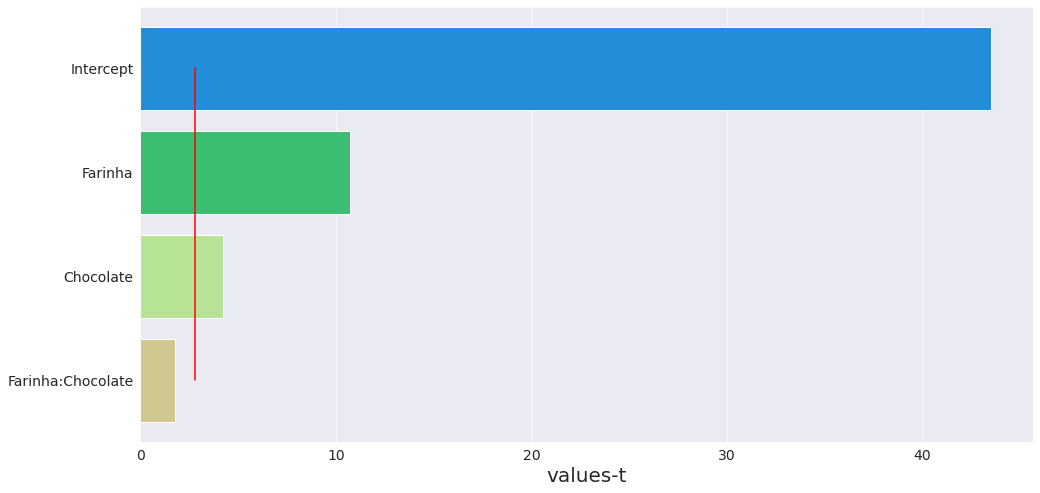

In [164]:
pareto = sns.barplot(x = values_t, y = names)
pareto.figure.set_size_inches(16, 8)

pareto.set_xlabel('values-t', fontsize = 20, y = 1.05)
pareto.tick_params(labelsize = 14)

pareto.plot(limit, names, 'r')

# <font color = 'purple'> Propondo um novo modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


<hr>

<img width='800px' src='../images/Figura_3.png'>

<p style='margin: 30px 30px;'> 

<hr>

<p style='margin: 200px 200px;'>


<hr>

<img width='600px' src='../images/Figura_9.png'> 

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>


<p style='margin: 30px 30px;'>

    
<hr>    


In [165]:
model = smf.ols(data = experiment, formula = 'Porcoes ~ Farinha + Chocolate')

In [166]:
fitted_model = model.fit()

In [167]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           0.000571
Time:                        11:01:57   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.000      28.710      33.040
Farinha       10.7500      1.191      9.025      0.000       7.688      13.812
Chocolate      4.2500      1.191      3.568      0.016       1.188       7.312
==============================================================================
Omnibus:                        2.106   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.349   Jarque-Bera (JB):                1.245
Skew:                           0.868   Prob(JB):                        0.537
Kurtosis:                       2.153   Cond. No.                         1.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<hr>

# <font color = 'purple'> Gráfico Padronizado de Pareto do novo modelo    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


In [168]:
values_t = fitted_model.tvalues
values_t

Intercept    36.658022
Farinha       9.025173
Chocolate     3.568092
dtype: float64

In [169]:
names = values_t.index.tolist()
names

['Intercept', 'Farinha', 'Chocolate']

### .

In [170]:
from scipy import stats

distribution = stats.t(5) # 5 -> Degrees Freedom
distribution.ppf(0.975)

2.5705818366147395

In [171]:
limit = [distribution.ppf(0.975)] * len(names)
limit

[2.5705818366147395, 2.5705818366147395, 2.5705818366147395]

### Plotando o gráfico

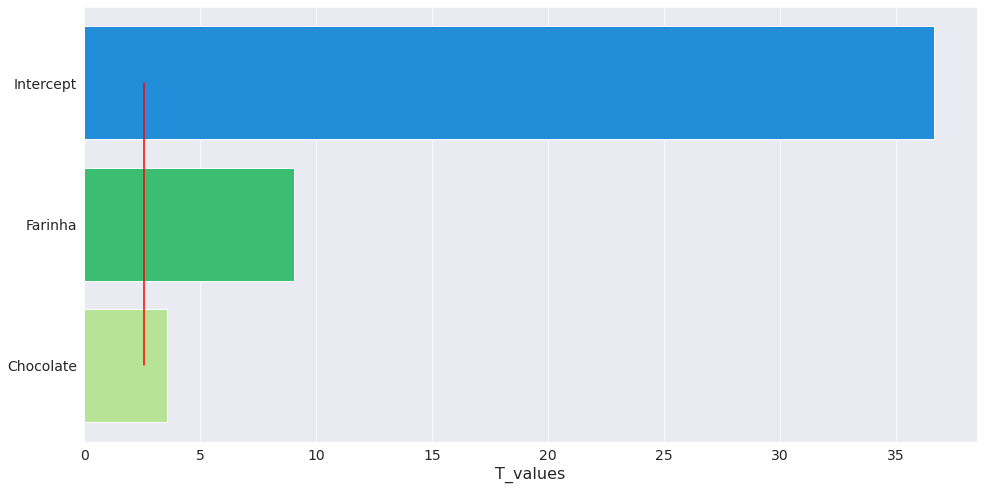

In [172]:
pareto = sns.barplot(x = values_t, y = names)

pareto.figure.set_size_inches(16, 8)
pareto.set_xlabel('T_values', fontsize = 16)
pareto.tick_params(labelsize = 14)

pareto.plot(limit, names, 'r')

<font color='red' style='font-size: 30px;'> Preditos por observados  </font>
<hr style='border: 2px solid red;'>

In [173]:
observed = experiment['Porcoes']

observed

0    19
1    37
2    24
3    49
4    29
5    30
6    29
7    30
Name: Porcoes, dtype: int64

### .

In [174]:
predicted = fitted_model.predict()

predicted

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

### .

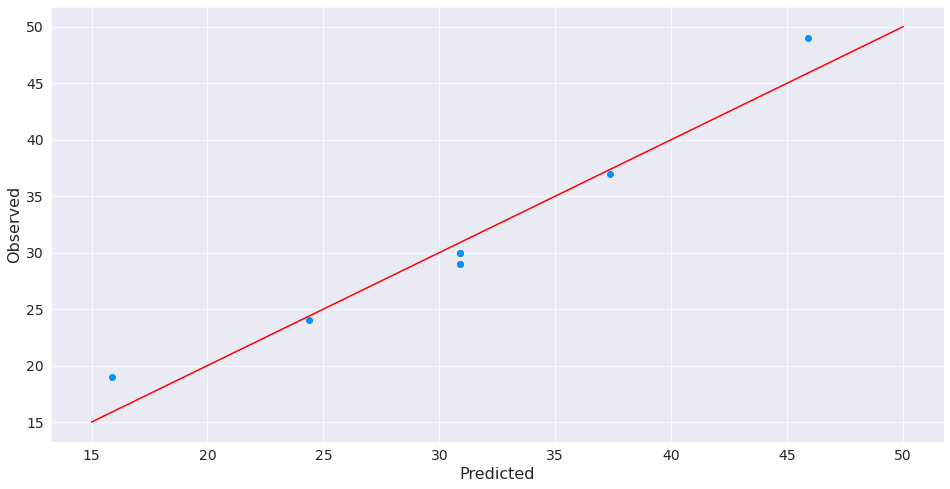

In [175]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 8))


# comparing 
ax.scatter(predicted, observed)

# Guide line
x = np.linspace(start = 15, stop = 50, num = 10)
y = np.linspace(start = 15, stop = 50, num = 10)

# ploting guide line
ax.plot(x, y, 'r')

# Setting labels and ticks
ax.set_xlabel('Predicted', fontsize = 16)
ax.set_ylabel('Observed', fontsize = 16)
ax.tick_params(labelsize = 14)

<hr>

In [176]:
fitted_model.summary() #Verifing the R-squared

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           0.000571
Time:                        11:01:57   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.000      28.710      33.040
Farinha       10.7500      1.191      9.025      0.000       7.688      13.812
Chocolate      4.2500      1.191      3.568      0.016       1.188       7.312
==============================================================================
Omnibus:                        2.106   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.349   Jarque-Bera (JB):                1.245
Skew:                           0.868   Prob(JB):                        0.537
Kurtosis:                       2.153   Cond. No.                         1.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### .

# <font color = 'purple'> Explorando o modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [177]:
params = fitted_model.params
params

Intercept    30.875
Farinha      10.750
Chocolate     4.250
dtype: float64

In [178]:
type(params)

pandas.core.series.Series

### .

### Definindo a função

In [179]:
def recipe_model(x_f, x_c):
    """
        Return the number of portions purchased
        
        Parameters
        ----------
        x_f : int 
            Amount of flour in the recipe(in grams) 
        x_c : array_like
            Amount of chocolate in the recipe(in grams)  
        
    """
    
    # limits
    normalized_limit = [-1, 1]
    
    flour_limit = [0.5, 1.5]
    chocolate_limit = [0.1, 0.5]
    
    # Convert
    x_f_converted = np.interp(x_f, flour_limit, normalized_limit)
    x_c_converted = np.interp(x_c, chocolate_limit, normalized_limit)
    
    
    # Calculing number of portions
    portions = params['Intercept'] + params['Farinha'] * x_f_converted + params['Chocolate'] * x_c_converted
    
    return round(portions)

In [180]:
recipe_model(0.7, 0.1)

20


<p style='margin: 150px 150px;'>


<hr>

<img width='700px' src='../images/Figura_22.png'> 


<hr>

# <font color = 'purple'> Mapa de cores   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


<p style='margin: 150px 150px;'>


<hr>

<img width='700px' src='../images/Figura_23.jpg'> 

#### Fonte: National Centers for Environmental Prediction


<hr>



<p style='margin: 50px 50px;'>




<p style='margin: 150px 150px;'>


<hr>

<img width='600px' src='../images/Figura_24.png'> 


<hr>



<p style='margin: 30px 30px;'>

In [181]:
x_flour = np.linspace(0.5, 1.5, 10)
x_flour

array([0.5       , 0.61111111, 0.72222222, 0.83333333, 0.94444444,
       1.05555556, 1.16666667, 1.27777778, 1.38888889, 1.5       ])

In [182]:
x_chocolate = np.linspace(0.1, 0.5, 10)
x_chocolate

array([0.1       , 0.14444444, 0.18888889, 0.23333333, 0.27777778,
       0.32222222, 0.36666667, 0.41111111, 0.45555556, 0.5       ])

### . 

In [183]:
points = []

for x_f in x_flour:
    temp = []
    for x_c in x_chocolate:
        temp.append(recipe_model(x_f, x_c))
    
    points.append(temp)


In [184]:
points

[[16, 17, 18, 19, 20, 21, 22, 22, 23, 24],
 [18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
 [21, 22, 23, 23, 24, 25, 26, 27, 28, 29],
 [23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
 [25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
 [28, 29, 30, 31, 32, 33, 33, 34, 35, 36],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [33, 34, 34, 35, 36, 37, 38, 39, 40, 41],
 [35, 36, 37, 38, 39, 40, 41, 42, 43, 43],
 [37, 38, 39, 40, 41, 42, 43, 44, 45, 46]]

### .

### Construindo a superfície de resposta

In [185]:
import matplotlib.cm as cm

https://matplotlib.org/users/colormaps.html

<a list of 10 text.Text objects>

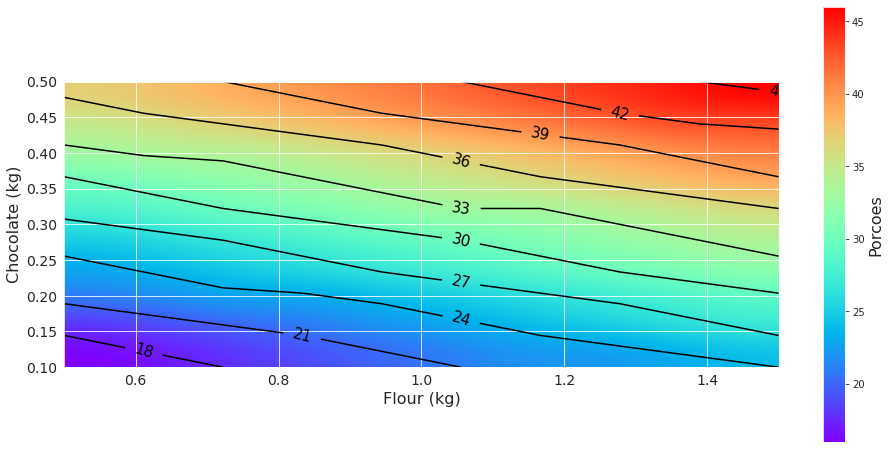

In [186]:
# base
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 8))

ax.set_xlabel('Flour (kg)', fontsize = 16)
ax.set_ylabel('Chocolate (kg)', fontsize = 16)
ax.tick_params(labelsize = 14)

# Color map
color_map = ax.imshow(
    points, 
    origin = 'lower',
    cmap = cm.rainbow, 
    interpolation = 'quadric', 
    extent = (0.5, 1.5, 0.1, 0.5)
)

# Color bar
color_bar = fig.colorbar(color_map)
color_bar.set_label('Porcoes', size = 16)

# lines
lines = ax.contour(x_flour, x_chocolate, points, colors = 'k', lw = 1.5, levels = 10)

ax.clabel(lines, inline = True, fontsize = 15, inline_spacing = 10)

In [187]:
recipe_model(1.2, 0.3)

35